In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cursos_coursera = pd.read_csv("./Datasets/Coursera_courses.csv")

In [4]:
cursos_coursera.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [5]:
cursos_coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [46]:
cursos_coursera.drop(columns="course_url",inplace=True)

In [7]:
coursera_reviews = pd.read_csv("./Datasets/Coursera_reviews.csv")

In [8]:
coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [9]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [10]:
coursera_reviews.describe()

,rating
count,1.454711e+06
mean,4.696649e+00
std,6.983271e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [11]:
coursera_reviews.dropna(inplace=True)

In [12]:
coursera_reviews.shape

(1454558, 5)

In [13]:
coursera_reviews["reviews"]

0          Pretty dry, but I was able to pass with just t...
1          would be a better experience if the video and ...
2          Information was perfect! The program itself wa...
3          A few grammatical mistakes on test made me do ...
4          Excellent course and the training provided was...
                                 ...                        
1454706                                                    g
1454707                                                    .
1454708                                                    .
1454709                                                    .
1454710                                                    G
Name: reviews, Length: 1454558, dtype: object

In [14]:
import nltk
import re

# Download necessary resources for NLTK
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

# Function to check if a review is poorly written
def mal_escrito(review):
    # Tokenize the review text
    tokens = nltk.word_tokenize(review)
  
    # Check if the review has less than a certain number of tokens
    if len(tokens) < 5:
        return True
  
    # Perform part-of-speech tagging on the tokens
    tagged_tokens = nltk.pos_tag(tokens)
  
    # Check if the review has mostly nouns and pronouns
    noun_count = 0
    pronoun_count = 0
    for token, tag in tagged_tokens:
        if re.match(r'NN.*', tag):
            noun_count += 1
        elif re.match(r'PRP.*', tag):
            pronoun_count += 1
  
    total_count = noun_count + pronoun_count
    if total_count > 0 and (noun_count / total_count) < 0.5:
        return True
  
    return False

# Apply the is_poorly_written function to drop poorly written reviews
coursera_reviews = coursera_reviews[~coursera_reviews["reviews"].apply(mal_escrito)]
coursera_reviews.to_csv("./Datasets/Coursera_reviews.csv")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [34]:
coursera_reviews["reviews"].drop_duplicates(inplace=True)

In [36]:
coursera_reviews["reviewers"] = coursera_reviews["reviewers"].str.strip()

In [37]:
coursera_reviews["reviewers"].value_counts()

reviewers
By Muhammad A       506
By Michael S        400
By David M          388
By Abhishek S       376
By Michael B        361
                   ... 
By PRAJWAL A K        1
By Mayesha M R M      1
By Vadakattu A S      1
By Terrance R         1
By Abiyyu F D         1
Name: count, Length: 234994, dtype: int64

In [17]:
coursera_reviews.drop(coursera_reviews[coursera_reviews["reviewers"]=="By Deleted A"].index,inplace=True)

In [39]:
coursera_reviews.drop(columns="date_reviews",inplace=True)

In [40]:
coursera_reviews.reset_index(inplace=True)

In [43]:
coursera_reviews.drop(columns="index",inplace=True)

In [49]:
coursera_reviews.head()

,reviews,reviewers,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training


In [50]:
cursos_coursera.head()

,name,institution,course_id
0,Machine Learning,Stanford University,machine-learning
1,Indigenous Canada,University of Alberta,indigenous-canada
2,The Science of Well-Being,Yale University,the-science-of-well-being
3,Technical Support Fundamentals,Google,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training


In [52]:
coursera_completo = coursera_reviews.merge(cursos_coursera, on="course_id")

In [53]:
coursera_completo

,reviews,reviewers,rating,course_id,name,institution
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
...,...,...,...,...,...,...
1158893,Awesome!!!!!!!,By Sammy,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158894,excelente!!!!!,By Maisa R A,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158895,Great so far!!,By Derrick W,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158896,Great so far!!,By Derrick W,5,technical-support-fundamentals,Technical Support Fundamentals,Google


In [58]:
coursera_completo["reviews"] = coursera_completo["reviews"].loc[~coursera_completo["reviews"].duplicated()]


In [60]:
coursera_completo.dropna(inplace=True)

In [62]:
coursera_completo["name"].value_counts()

name
Programming for Everybody (Getting Started with Python)                           13421
Machine Learning                                                                  12247
Neural Networks and Deep Learning                                                 11900
Learning How to Learn: Powerful mental tools to help you master tough subjects    10758
Technical Support Fundamentals                                                     9669
                                                                                  ...  
Epigenetic Control of Gene Expression                                                 2
Entreprise et changement climatique                                                   2
Entrepreneurship Strategy: From Ideation to Exit                                      1
Introduction to Healthcare                                                            1
Curanderismo: Traditional Healing Using Plants                                        1
Name: count, Length: 602, d

In [63]:
conteo_names = coursera_completo["name"].value_counts()
coursera_completo = coursera_completo[coursera_completo["name"].isin(conteo_names[conteo_names > 5000].index)]


In [64]:
coursera_completo

,reviews,reviewers,rating,course_id,name,institution
13795,I did not find this course helpful. The assign...,By Eric V H,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13796,I got a 95% and maybe I learned something but ...,By Connor B,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13797,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13798,We tried to use this class to teach a brown ba...,By Steve M,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13799,"To be honest, I thought the course stumbled an...",By Terence P,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
...,...,...,...,...,...,...
1158865,great class !!!,By Olibrice D,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158883,loved it\(00)/,By Austin P,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158885,Awesome!!!!!!!,By Sammy,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158886,excelente!!!!!,By Maisa R A,5,technical-support-fundamentals,Technical Support Fundamentals,Google


In [65]:
coursera_graph = coursera_completo[["rating","course_id"]]

In [69]:
coursera_graph = coursera_graph.groupby(by="course_id")["rating"].sum()

In [72]:
coursera_graph = coursera_graph.to_frame().reset_index()


In [74]:
coursera_graph.sort_values("rating",ascending=False)

,course_id,rating
5,python,62614
3,machine-learning,58319
4,neural-networks-deep-learning,56955
2,learning-how-to-learn,51918
7,technical-support-fundamentals,46170
6,python-data,42476
8,the-science-of-well-being,32936
1,excel-essentials,27869
0,ai-for-everyone,26766
9,what-is-datascience,26452


In [18]:
edx = pd.read_csv("./Datasets/edx_courses.csv")

In [19]:
edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [20]:
duracionedx = edx[["course_length","n_enrolled"]]

In [21]:
duracionedx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   course_length  975 non-null    object
 1   n_enrolled     855 non-null    object
dtypes: object(2)
memory usage: 15.4+ KB


In [22]:
duracionedx.dropna(inplace=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3256\3551054789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duracionedx.dropna(inplace=True)


In [23]:
duracionedx["n_enrolled"] = duracionedx["n_enrolled"].replace(",","",regex=True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3256\82838069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duracionedx["n_enrolled"] = duracionedx["n_enrolled"].replace(",","",regex=True)


In [24]:
duracionedx["n_enrolled"] = duracionedx["n_enrolled"].astype("Int64")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3256\640552966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duracionedx["n_enrolled"] = duracionedx["n_enrolled"].astype("Int64")


In [25]:
duracionedx.groupby(by="course_length")["n_enrolled"].sum()

course_length
1 Weeks      242487
10 Weeks    4467724
11 Weeks     707309
12 Weeks    6028773
13 Weeks     382699
14 Weeks    1203766
15 Weeks    1288078
16 Weeks     897308
17 Weeks       9169
18 Weeks     124578
2 Weeks      417677
3 Weeks      484470
4 Weeks     5748168
5 Weeks     5251679
6 Weeks     7720388
7 Weeks     3579155
8 Weeks     5846822
9 Weeks     1137350
Name: n_enrolled, dtype: Int64

In [26]:
udemy = pd.read_csv("./Datasets/udemy_courses.csv")

In [27]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [28]:
udemy_paid = udemy[["is_paid","num_subscribers"]]

In [29]:
udemy_paid = udemy_paid.groupby(by="is_paid")["num_subscribers"].sum()

In [30]:
udemy_paid = pd.DataFrame(udemy_paid)

In [31]:
udemy_paid = udemy_paid.reset_index()

<Axes: ylabel='num_subscribers'>

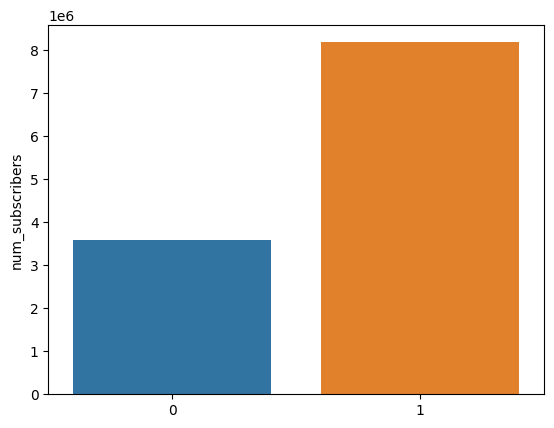

In [32]:
sns.barplot(data=udemy_paid,x=udemy_paid.index,y="num_subscribers")